In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("E:\datascience\MACHINE LEARNING\EDA\google.csv")

In [3]:
df=dataset

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df.shape

(10841, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [9]:
df['Category'].nunique()

34

In [10]:
df['Rating'].nunique()

40

### checking missing values and replace

In [11]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

rating,type,content rating current ver,android ver has null values

Here, we realized that there are 1474 rows having null values under column 'Rating'. Hence, 
we decided to replace the null values with median of overall 'Rating' values.

In [12]:
def replace_with_median(series):
    return series.fillna(series.median())

replace row with null values with median values

In [13]:
df['Rating']=df['Rating'].transform(replace_with_median)
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    4.3
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [14]:
df['Rating'].isnull().sum()

0

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [16]:
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [17]:
df['Type'].value_counts()   # free has 10039

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

replace type 1 null value with mode value

In [18]:
df['Type'].mode()

0    Free
Name: Type, dtype: object

In [19]:
df['Type']=df['Type'].replace(np.nan,'Free')   # replace null value to free

In [20]:
df['Type'].value_counts()  #free becomes 10040

Free    10040
Paid      800
0           1
Name: Type, dtype: int64

In [21]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [22]:
df['Content Rating'].value_counts()  # everyone count=8714

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

replace 1 null value of content rating with mode

In [23]:
df['Content Rating'].mode()

0    Everyone
Name: Content Rating, dtype: object

In [24]:
df['Content Rating']=df['Content Rating'].replace(np.nan,'Everyone') #replace 1 null value with mode

In [25]:
df['Content Rating'].value_counts()  # everyone count=8715

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [26]:
df['Current Ver'].mode()

0    Varies with device
Name: Current Ver, dtype: object

In [27]:
df['Current Ver']=df['Current Ver'].replace(np.nan,'Varies with device')

In [28]:
df['Current Ver'].value_counts()

Varies with device    1467
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
1.0.17.3905              1
15.1.2                   1
4.94.19                  1
1.1.11.11                1
2.0.148.0                1
Name: Current Ver, Length: 2832, dtype: int64

In [29]:
df['Android Ver'].mode()

0    4.1 and up
Name: Android Ver, dtype: object

In [30]:
df['Android Ver']=df['Android Ver'].replace(np.nan,'4.1 and up')

In [31]:
df['Android Ver'].value_counts()

4.1 and up            2454
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [32]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

data is cleaned, no null values in data

### checking duplicate values

In [33]:
df.shape

(10841, 13)

In [34]:
df['Category'].nunique()

34

34 category are unique in dataset

In [35]:
df.drop_duplicates()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
df.shape

(10841, 13)

In [37]:
10841-10358

483

drop 483 records bec those are duplicates

### convert categorical data to numerical data

In [38]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [39]:
df['Reviews'].nunique()

6002

#### 1) clean the 'Reviews' data and change the type 'object' to 'float'

In [40]:
def clean_review(review):
    cleaned=[]
    for i in review:
        if 'M' in i:
            i=i.replace('M','')
            i=float(i)
        cleaned.append(i)
    return cleaned

In [41]:
df['Reviews']=clean_review(df['Reviews'])

In [42]:
df['Reviews']=df['Reviews'].astype(float)

In [43]:
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

#### 2) clean the 'Size' data and change the type 'object' to 'float'

In [44]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [45]:
df['Size'].shape

(10841,)

In [46]:
ind= np.where(df['Size']=='1,000+')
ind

(array([10472], dtype=int64),)

In [47]:
a=df.iloc[ind]
a

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [48]:
df=df.drop(ind[0])

In [49]:
def clean_size(size):
    cleaned=[]
    for i in size:
        if 'M' in i:
            i=i.replace('M','')
            i=float(i)
        elif 'k' in i:
            i=i.replace('k','')
            i=float(i)
            i=i/1024
        elif 'Varies with device' in i:
            i=float(0)
        cleaned.append(i)
    return cleaned

In [50]:
df['Size']=clean_size(df['Size'])

In [51]:
df['Size']=df['Size'].astype(float)
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     0.0
10840    19.0
Name: Size, Length: 10840, dtype: float64

#### 3) clean the 'install' data and change the type 'object' to 'float'

In [52]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [53]:
def clean_install(install):
    cleaned=[]
    for i in install:
        if '+' in i:
            i=i.replace('+','')
        if ',' in i:
            i=i.replace(',','')     
        cleaned.append(i)
    return cleaned   
        

In [54]:
df['Installs']=clean_install(df['Installs'])

In [55]:
df['Installs']=df['Installs'].astype(float)

In [56]:
df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

#### 4) clean the 'price' data and change the type 'object' to 'float'

In [57]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [58]:
def clean_price(price):
    cleaned=[]
    for i in price:
        if '$' in i:
            i=i.replace('$','')
        cleaned.append(i)
    return cleaned

In [59]:
df['Price']=clean_price(df['Price'])

In [60]:
df['Price']=df['Price'].astype(float)

In [61]:
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10840, dtype: float64

In [62]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### checking outlier

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

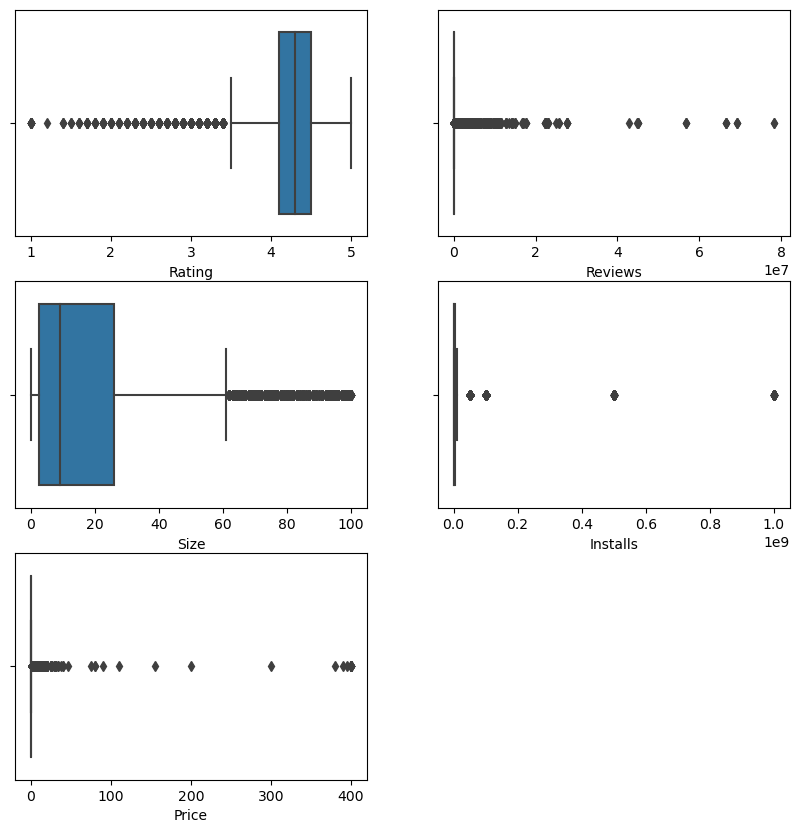

In [63]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)   # 3 row 2 column 1 subplot
sns.boxplot(df['Rating'],data=df)

plt.subplot(3,2,2)
sns.boxplot(df['Reviews'],data=df)

plt.subplot(3,2,3)
sns.boxplot(df['Size'],data=df)

plt.subplot(3,2,4)
sns.boxplot(df['Installs'],data=df)

plt.subplot(3,2,5)
sns.boxplot(df['Price'],data=df)

plt.show()


in this box plot we can see that in price,reviews,installs column most of outlier are observed and in size column continuous outlier is observed and in rating column below lower fence outlier is observed 

## visualization

In [64]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


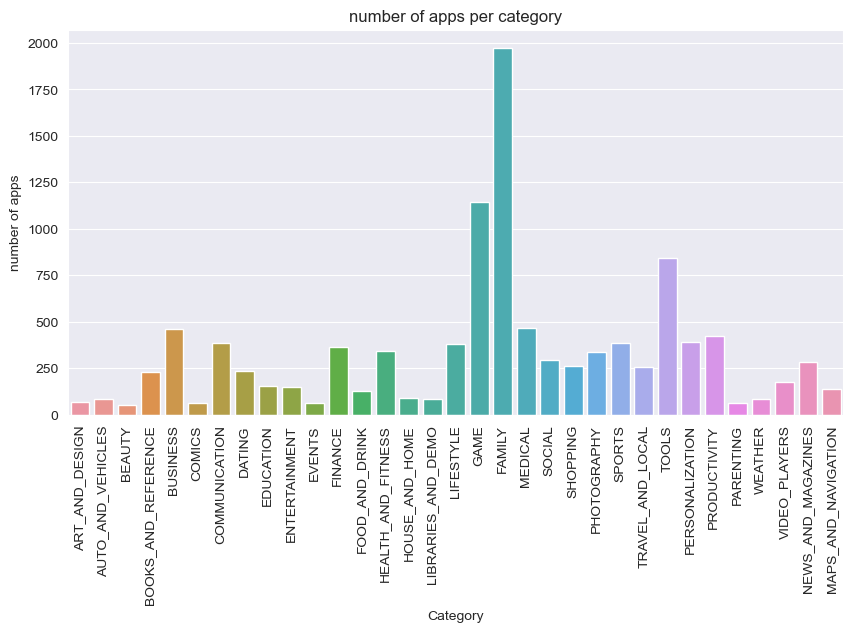

In [65]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
sns.countplot(x=df['Category'],data=df)
plt.xticks(rotation=90)
plt.title("number of apps per category")
plt.ylabel("number of apps")
plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.

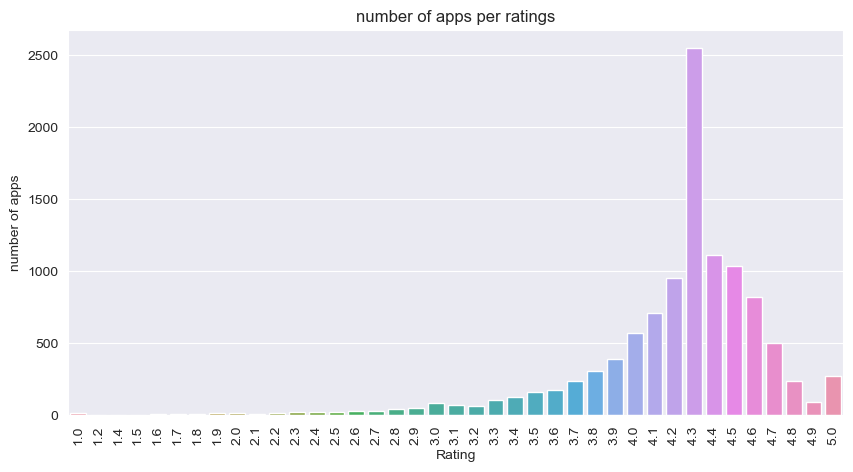

In [66]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
sns.countplot(x=df['Rating'],data=df)
plt.xticks(rotation=90)
plt.title("number of apps per ratings")
plt.ylabel("number of apps")
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7.

### find out no of install per category

In [67]:
categories=df.groupby(df['Category'])

In [68]:
category_install=categories[['Installs']].sum()
category_install=category_install.reset_index()
category_install

,Category,Installs
0,ART_AND_DESIGN,1.243381e+08
1,AUTO_AND_VEHICLES,5.313021e+07
2,BEAUTY,2.719705e+07
3,BOOKS_AND_REFERENCE,1.921470e+09
4,BUSINESS,1.001915e+09
5,COMICS,5.608615e+07
6,COMMUNICATION,3.264728e+10
7,DATING,2.643108e+08
8,EDUCATION,8.714520e+08
9,ENTERTAINMENT,2.869160e+09


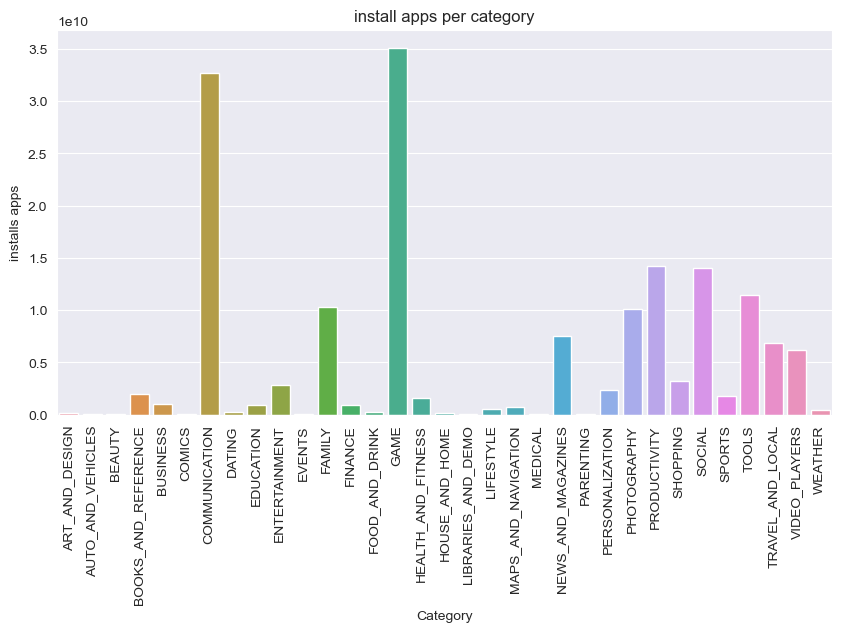

In [69]:
sns.set_style('darkgrid')

plt.figure(figsize=(10,5))
sns.barplot(x=category_install['Category'],y=category_install['Installs'],data=df)
plt.xticks(rotation=90)
plt.title("install apps per category")
plt.xlabel("Category")
plt.ylabel("installs apps")
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

In [70]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [71]:
rating_df = df.groupby('Rating').sum().reset_index()
rating_df.head()

,Rating,Reviews,Size,Installs,Price
0,1.0,28.0,228.8,5170.0,4.48
1,1.2,44.0,27.0,1000.0,0.00
2,1.4,98.0,20.2,7000.0,0.00
3,1.5,61.0,54.0,1105.0,0.00
4,1.6,691.0,64.6,152000.0,0.00


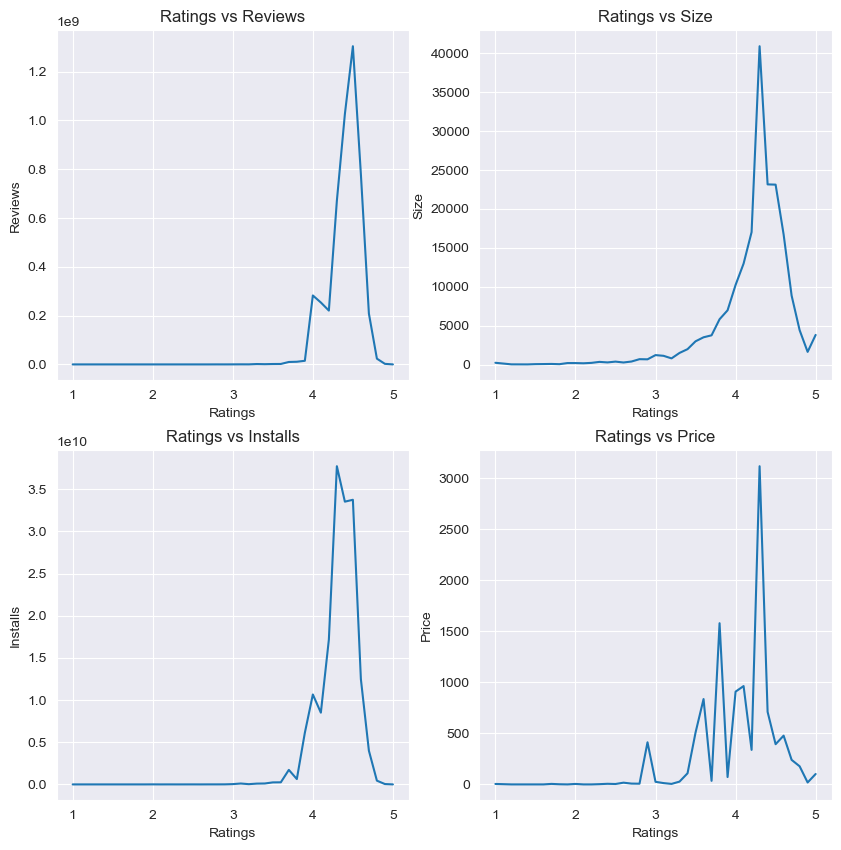

In [72]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(rating_df['Rating'],rating_df['Reviews'])
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.title('Ratings vs Reviews')

plt.subplot(222)
plt.plot(rating_df['Rating'],rating_df['Size'])
plt.xlabel('Ratings')
plt.ylabel('Size')
plt.title('Ratings vs Size')

plt.subplot(223)
plt.plot(rating_df['Rating'],rating_df['Installs'])
plt.xlabel('Ratings')
plt.ylabel('Installs')
plt.title('Ratings vs Installs')

plt.subplot(224)
plt.plot(rating_df['Rating'],rating_df['Price'])
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.title('Ratings vs Price')
plt.show()

From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating.

In [73]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

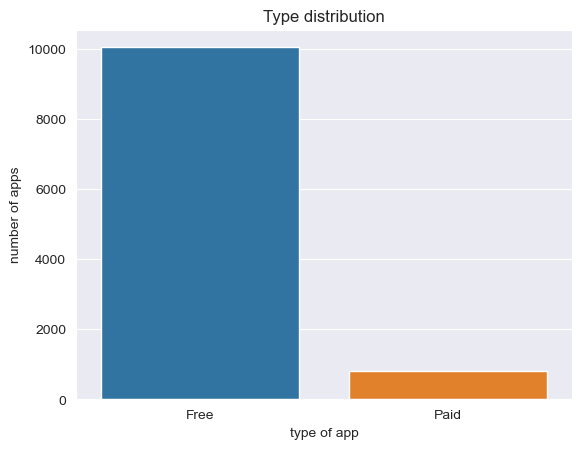

In [74]:
sns.countplot(x=df['Type'])
plt.title('Type distribution')
plt.xlabel('type of app')
plt.ylabel('number of apps')
plt.show()

From the plot we can imply that majority of the apps in the Play Store are Free apps.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


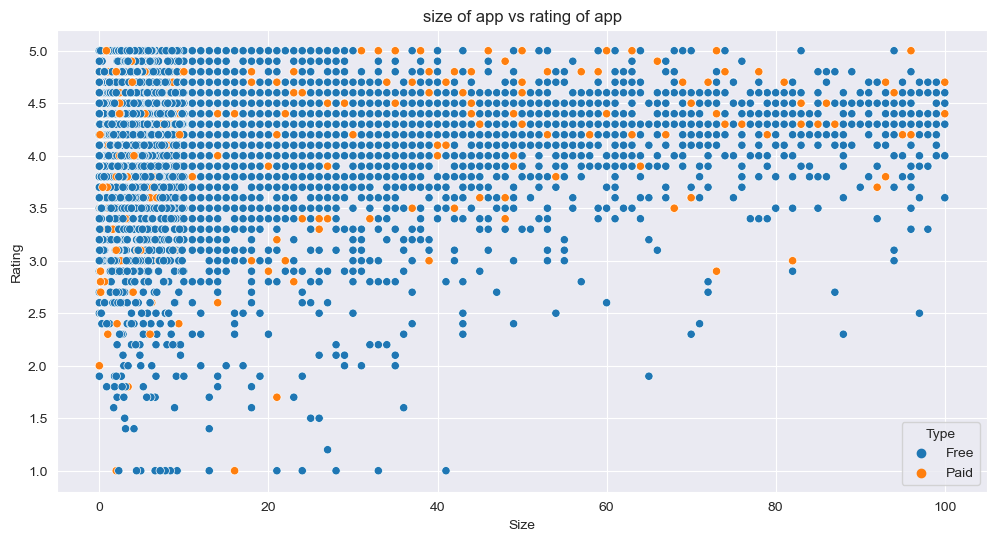

In [75]:
#show the distribution of apps in term of their rating, size and type
plt.figure(figsize=(12, 6))
sns.scatterplot(df['Size'],df['Rating'],hue=df['Type'])
plt.title("size of app vs rating of app")
plt.show()

### ckecking correlation

In [76]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.037089,0.045496,-0.019318
Reviews,0.063166,1.000000,0.065459,0.643122,-0.009667
Size,0.037089,0.065459,1.000000,-0.003454,-0.013459
Installs,0.045496,0.643122,-0.003454,1.000000,-0.011689
Price,-0.019318,-0.009667,-0.013459,-0.011689,1.000000


<AxesSubplot:>

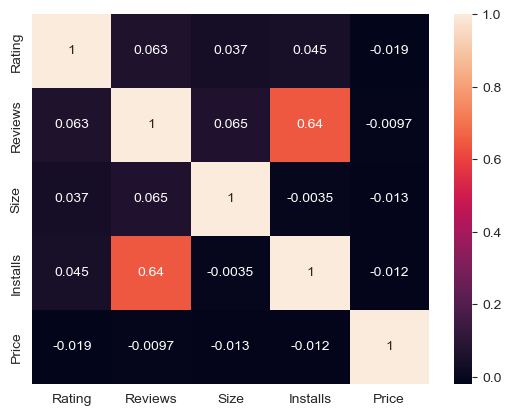

In [77]:
sns.heatmap(df.corr(),annot=True)

-install apps and reviews of apps are in positive correlation between them (0.64) means reviews increases then install apps are also increases
-price vs ratings,reviews,size,installs has negative correlation between them

## Asking and Answering Questions

### 1. What is the top 5 apps on the basis of installs?

In [78]:
df1=df.sort_values(by=['Installs'],ascending=False)
df1['App'].head()

3896                              Subway Surfers
3943                                    Facebook
335     Messenger – Text and Video Chat for Free
3523                                Google Drive
3565                                Google Drive
Name: App, dtype: object

In [79]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df1["App"].head(5))}')

The 5 apps that have the most number of installs are: Subway Surfers, Facebook, Messenger – Text and Video Chat for Free, Google Drive, Google Drive


### 2. What is the top 5 reviewed apps?

In [80]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [81]:
df_group = df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df2 = df_group.sort_values(by=['Reviews'], ascending=False)
df2.head(5)

,App,Category,Rating,Reviews
5451,Instagram,SOCIAL,4.5,266241989.0
9132,WhatsApp Messenger,COMMUNICATION,4.4,207348304.0
6223,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,169932272.0
8159,Subway Surfers,GAME,4.5,166331958.0
4364,Facebook,SOCIAL,4.1,156286514.0


In [82]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df2["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Instagram, WhatsApp Messenger, Messenger – Text and Video Chat for Free, Subway Surfers, Facebook


### 3. What is the top 5 expensive apps?

In [83]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [84]:
df3=df.sort_values(by=['Price'],ascending=False)
df3['App'].head()

4367    I'm Rich - Trump Edition
5351                   I am rich
5358                  I am Rich!
4197      most expensive app (H)
5369                   I am Rich
Name: App, dtype: object

In [85]:
print(f'top 5 expensive apps are: {",".join(df3["App"].head(5))}')

top 5 expensive apps are: I'm Rich - Trump Edition,I am rich,I am Rich!,most expensive app (H),I am Rich


### 4. What is the top 3 most installed apps in Game category?

In [86]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [87]:
df4 = df[df['Category'] == 'GAME']
df4 = df4.sort_values(by=['Installs'], ascending=False)
df4.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1750,Subway Surfers,GAME,4.5,27724094.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1654,Subway Surfers,GAME,4.5,27722264.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
1700,Subway Surfers,GAME,4.5,27723193.0,76.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up


### 5. Which 5 apps from the 'FAMILY' category are having the lowest rating?

In [88]:

df5 = df[df['Category'] == 'FAMILY']
df6 = df5.sort_values(by=['Rating'], ascending=True)
df6.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4127,Speech Therapy: F,FAMILY,1.0,1.0,16.0,10.0,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up
10324,FE Mechanical Engineering Prep,FAMILY,1.0,2.0,21.0,1000.0,Free,0.00,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up
5978,Truck Driving Test Class 3 BC,FAMILY,1.0,1.0,2.0,50.0,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up
4905,AC REMOTE UNIVERSAL-PRO,FAMILY,1.6,402.0,1.7,100000.0,Free,0.00,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up
6135,BG TV App,FAMILY,1.7,6.0,2.9,100.0,Free,0.00,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up


In [89]:
print(f'5 apps from the family category are having the lowest rating: {",".join(df6["App"].head(5))}')

5 apps from the family category are having the lowest rating: Speech Therapy: F,FE Mechanical Engineering Prep,Truck Driving Test Class 3 BC,AC REMOTE UNIVERSAL-PRO,BG TV App


## conclusion

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc.

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps.